<a href="https://colab.research.google.com/github/ShinryuZz/otonapro_california/blob/master/orotnapro_california_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# オトナの機械学習入門のためのサンプルコード （advanced）

## 概要
scikit-learnが提供しているカリフォルニア住宅価格のデータセットを用いて、機械学習回帰モデルの構築をする。

## 注意
学術的に厳密に書いていない（書けない）部分も多々あるので、全ての文章の先頭に、「誤解を恐れずに言うと・素人学生から見ると」みたいな文章をつけているものとさせてください。

## イベント情報
開催日時：2023/04/12 Wed. 19:00 ~ 21:00

開催場所: XOSSPOINT.

作成者: 熊本大学大学院1年 松岡 伸龍 （mshin1127@gmail.com）


## データセットの準備と探検
* ここでは、提供されている実世界のデータセット（カリフォルニア住宅価格）を読み込んで、それがどんなデータであり、どんな特徴を持っているのかを探ってみます

### matplotlibで日本語を使うためのライブラリをインストールする
* 英語が苦手な人は、インストールしてください
* 必要ない人（英語のまま進めていい人）はこの作業は不要です

In [ ]:
!pip install japanize_matplotlib 
import japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=28444af7fd6ba8ae299c44c646775121c0b13abf0d6713d3b9a7ac7d79ad59ec
  Stored in directory: /root/.cache/pip/wheels/91/8f/c2/83055ad0c9591b0a094730aa7cb2cc12fedacbcd2241baf534
Successfully built japanize_matplotlib


### データセットの読み込みと概要の確認
* 今回のデータセットは、scikit-learnが提供しています。
* そのためsklearnモジュールからデータセットを直接インポートすることができます。
* まずは 概要を見てみましょう

In [ ]:
from sklearn.datasets import fetch_california_housing # カリフォルニア住宅価格のデータセットをインポート

california = fetch_california_housing() # データセットの読み込み
print(california.DESCR) # データセットの説明(Description)を見てみる

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### データの中の数値を見てみる
* DataFrameを使用するためにpandasをインポートして、今回使用するデータセットの中の具体的な値を見てみます。

In [ ]:
import pandas as pd  # DataFrameを扱うためのライブラリをインポート

df = pd.DataFrame(california.data, columns=california.feature_names) # df: DataFrameの略
df["Price"] = california.target # 今回のターゲットである住宅価格（Price）を挿入する
df.set_axis(["収入", "築年数", "平均部屋数", "平均寝室数", "人口", "平均世帯人数", "緯度", "経度", "住宅価格"], axis=1, inplace=True) # カラム名を日本語に置き換える（必須では有りません）
df.head() # head()メソッドでdf の中身を表示してみる

,収入,築年数,平均部屋数,平均寝室数,人口,平均世帯人数,緯度,経度,住宅価格
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### データの統計量を見てみる
* 平均、標準偏差などの基本統計量をみて、データの特徴を確認します
* たくさんの項目があって大変なので、うまくスルーしてください

In [ ]:
df.describe() # 平均、標準偏差などの統計量を出力する

,収入,築年数,平均部屋数,平均寝室数,人口,平均世帯人数,緯度,経度,住宅価格
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### データのヒストグラムを表示してみる
* 上の統計量だとよくわかりにくいです。ですので視覚化してみます。
* ヒストグラムを表示することで、各データのばらつき具合・分布をみることができます

array([[<Axes: title={'center': '収入'}>, <Axes: title={'center': '築年数'}>,
        <Axes: title={'center': '平均部屋数'}>],
       [<Axes: title={'center': '平均寝室数'}>,
        <Axes: title={'center': '人口'}>,
        <Axes: title={'center': '平均世帯人数'}>],
       [<Axes: title={'center': '緯度'}>, <Axes: title={'center': '経度'}>,
        <Axes: title={'center': '住宅価格'}>]], dtype=object)

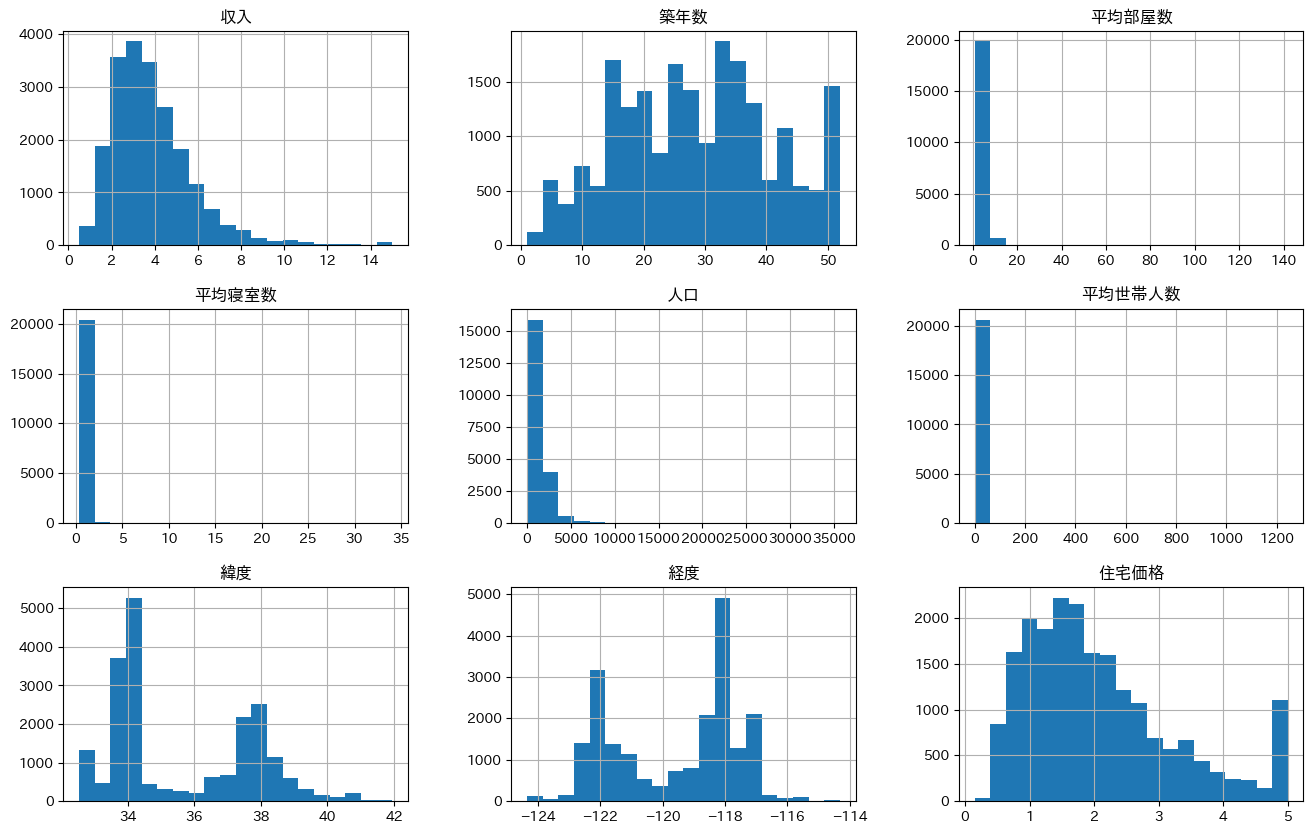

In [ ]:
import matplotlib.pyplot as plt # グラフ描画のためのライブラリをインポート

df.hist(figsize=(16, 10), bins=20) # 各特徴量のヒストグラムをプロットする

### 欠損地の有無を確認する
* データセットに欠損値があると、適切に演算やモデルの学習をすることができなくなります。
* 今回は欠損値はありませんが、現実世界には綺麗なデータがあることは少なく、欠損値にたいしては除外したり、補完処理を行ったりします。

In [ ]:
# 欠損値の確認
df.isnull().sum()

収入        0
築年数       0
平均部屋数     0
平均寝室数     0
人口        0
平均世帯人数    0
緯度        0
経度        0
住宅価格      0
dtype: int64

### 平均部屋数と平均寝室数の分布ををプロットする
* 部屋の数が100を超えるっておかしいと思いませんか？
* どんな地区でしょうか。。。
* 該当する2点の緯度経度をGoogleマップで検索して、航空写真を除いてみましょう。
* 面白いことがわかるかもしれません。

,収入,築年数,平均部屋数,平均寝室数,人口,平均世帯人数,緯度,経度,住宅価格
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500


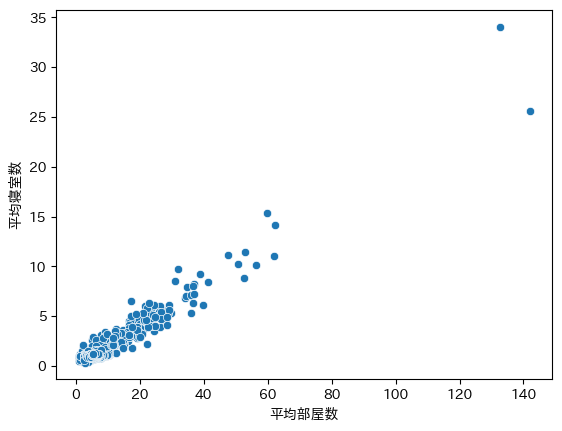

In [ ]:
import seaborn as sns # データ可視化ライブラリのインポート

# 外れ値を見てみる
sns.scatterplot(data=df, x='平均部屋数', y='平均寝室数') # 平均部屋数（AveRooms）を横軸に、平均ベッド数（AveBedrom）を縦軸に散布図をプロットする
df[df['平均部屋数']>100] # AveRoomsの値が100を超えているデータを出力する

### 平均世帯人数をプロットする
* 平均世帯人数600人とか1200人ってのもなかなかありえないような数値ですよね。
* これも上と同じく、その該当するブロックの緯度経度をGoogle Mapで検索してみると何かわかるかも？


<Axes: ylabel='平均世帯人数'>

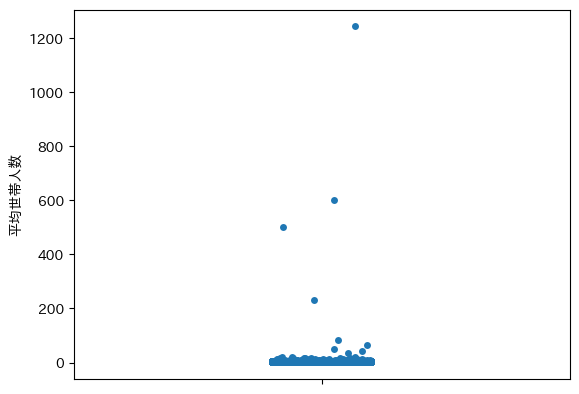

In [ ]:
sns.stripplot(data = df['平均世帯人数'])


### 新しい特徴量を定義する
* 以上のことから、より信頼性が高く、違和感なく分布をしそうな、新しい特徴量を定義することにします。

In [ ]:
df["世帯数"] = df["人口"]/df["平均世帯人数"] # 世帯数を算出
df["総寝室数"] = df["平均寝室数"]/df["世帯数"]
df["総部屋数"] = df["平均部屋数"]/df["世帯数"]

df.head()

,収入,築年数,平均部屋数,平均寝室数,人口,平均世帯人数,緯度,経度,住宅価格,世帯数,総寝室数,総部屋数
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,126.0,0.008125,0.055430
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1138.0,0.000854,0.005482
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,177.0,0.006065,0.046826
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,219.0,0.004900,0.026563
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,259.0,0.004174,0.024254


### 新しく定義した世帯数のばらつきをプロットする
* そんなに違和感がある数字ではないでしょう。
* 世帯数6000に該当するブロックをまたまたGoogle Mapで検索してみてもいいでしょう。

<Axes: ylabel='世帯数'>

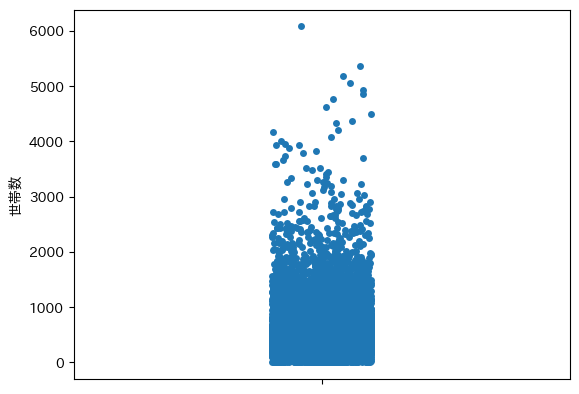

In [ ]:
import seaborn as sns # データ可視化ライブラリのインポート

sns.stripplot(data = df['世帯数'])

### いくつかの外れ値を除去する
* 詳細は割愛しますが、大きな外れ値があるとモデルの性能に悪影響を及ぼしたりするので、それらは除去することが望ましいです。
* 外れ値の扱い方もデータサイエンティストの腕の見せ所で、いろんな見解・対処法（±2σ以外のデータを除去する、95%だけを取得するなど）があると思いますが、今回は**単純に最大値を除去**します。



In [ ]:
df = df[df["住宅価格"] < df["住宅価格"].max()] # Priceの大値を除去する
df= df[df["収入"] < df["収入"].max()] # 平均収入の最大値を除去する
df= df[df["築年数"] < df["築年数"].max()] # 築年数の最大値を除去する




### データの数が減ったことを確認する
*元のデータセット数：20640個





In [ ]:
df.shape[0]

18570

### 特徴量の取捨選択
* 平均部屋数、平均寝室数、平均世帯人数は以上に大きな値があるので、代わりに世帯数などを使うことにします。

In [ ]:
unuse_features_list = [
    "平均部屋数",
    "平均寝室数",
    "平均世帯人数",
]
df.drop(unuse_features_list, axis=1, inplace=True) # 特定のカラムを削除
df.head()

,収入,築年数,人口,緯度,経度,住宅価格,世帯数,総寝室数,総部屋数
0,8.3252,41.0,322.0,37.88,-122.23,4.526,126.0,0.008125,0.055430
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,1138.0,0.000854,0.005482
8,2.0804,42.0,1206.0,37.84,-122.26,2.267,595.0,0.001878,0.007217
15,2.1250,50.0,697.0,37.85,-122.26,1.400,264.0,0.004060,0.016070
18,1.9911,50.0,990.0,37.84,-122.26,1.587,419.0,0.002592,0.012753


### 再度ヒストグラムを確認する

array([[<Axes: title={'center': '収入'}>, <Axes: title={'center': '築年数'}>,
        <Axes: title={'center': '人口'}>],
       [<Axes: title={'center': '緯度'}>, <Axes: title={'center': '経度'}>,
        <Axes: title={'center': '住宅価格'}>],
       [<Axes: title={'center': '世帯数'}>,
        <Axes: title={'center': '総寝室数'}>,
        <Axes: title={'center': '総部屋数'}>]], dtype=object)

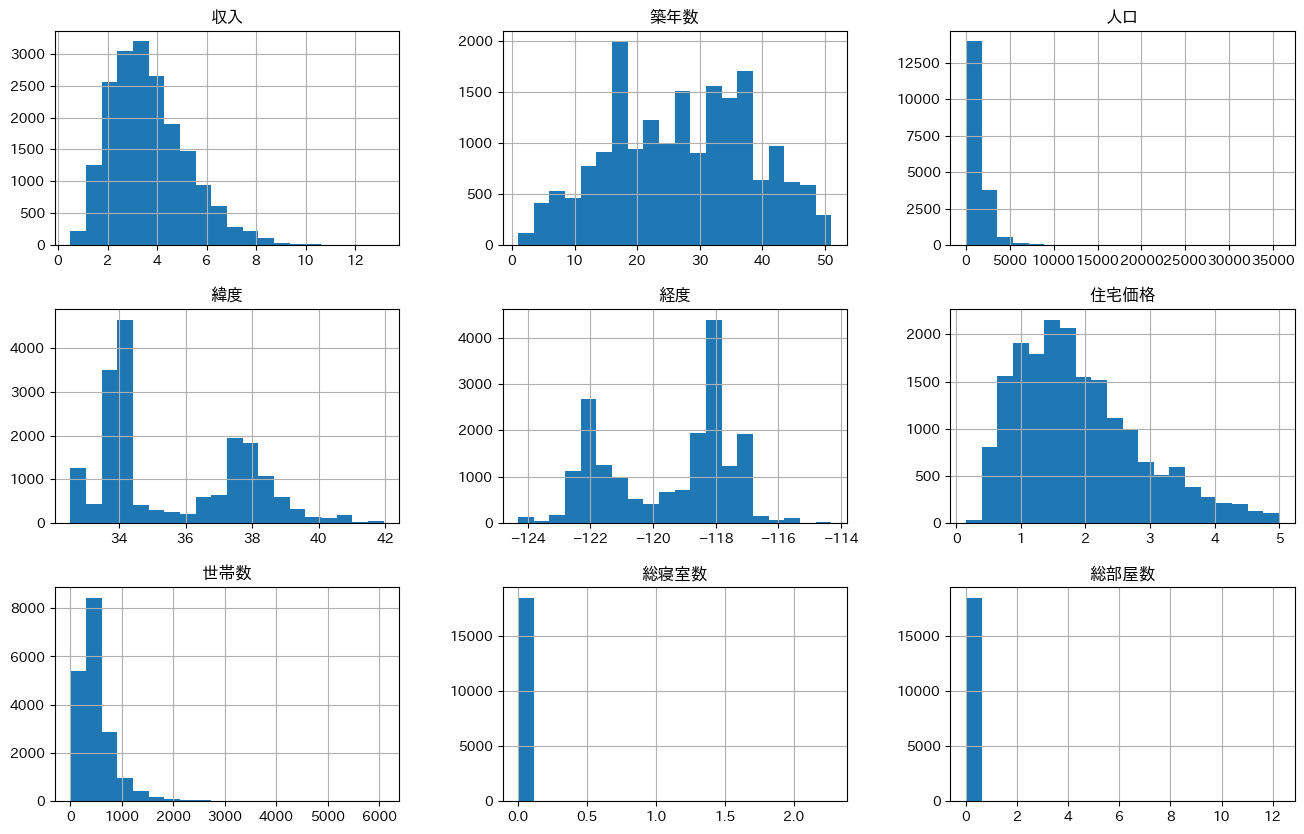

In [ ]:
df.hist(figsize=(16, 10), bins=20)

In [ ]:
df.head()

,収入,築年数,人口,緯度,経度,住宅価格,世帯数,総寝室数,総部屋数
0,8.3252,41.0,322.0,37.88,-122.23,4.526,126.0,0.008125,0.055430
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,1138.0,0.000854,0.005482
8,2.0804,42.0,1206.0,37.84,-122.26,2.267,595.0,0.001878,0.007217
15,2.1250,50.0,697.0,37.85,-122.26,1.400,264.0,0.004060,0.016070
18,1.9911,50.0,990.0,37.84,-122.26,1.587,419.0,0.002592,0.012753


### 住宅価格（Price） と他のデータ列の相関関係について見てみる
相関関係とは、２つの事柄がお互いに関わり合っている関係のことです。

例） 
* 気温とアイスクリームの売上（正の相関）
* スマホの使用時間と睡眠時間（負の相関）

注意）
相関関係≠因果関係（因果関係が相関関係に包含されています。）




<Axes: >

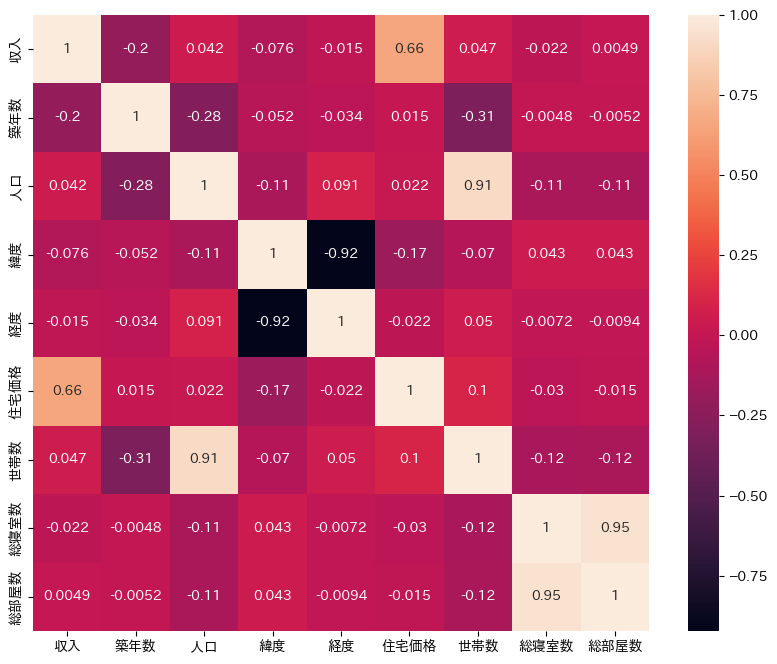

In [ ]:
import seaborn as sns # データ可視化ライブラリのインポート

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, square=True) # corr = correlation; 相関係数

**上のヒートマップからわかること**

* 住宅価格との相関が強いのは収入
* 緯度と経度は負の相関がある → マッピングしてみるとどうなるだろうか。

### 場所と人口分布、住宅価格の関係を可視化してみる



<Axes: xlabel='経度', ylabel='緯度'>

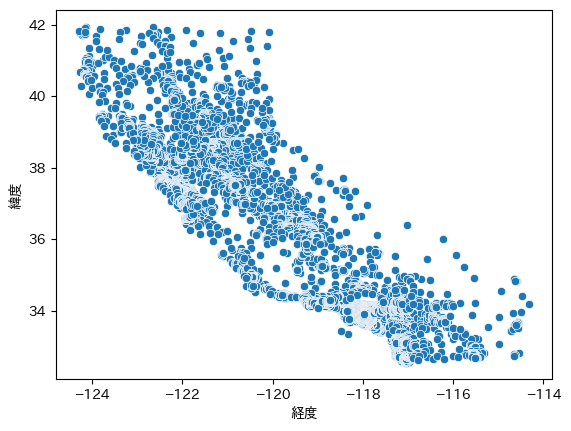

In [ ]:
# まずはシンプルにX-Y平面にデータをプロットしてみる
sns.scatterplot(data=df, x='経度', y='緯度')

**上の散布図からわかること**
* カリフォルニアの地理と一致していますね！（地図を確認してみてください）
* 海岸に近づくにつれて、人口が多く、住宅価格が高いことがわかると思います（文字通り西海岸！ベイエリア！）

<Axes: xlabel='経度', ylabel='緯度'>

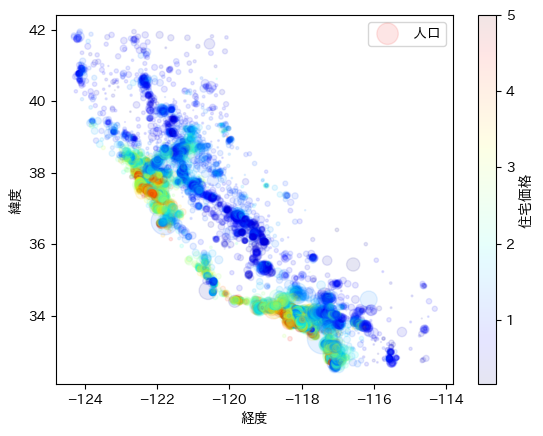

In [ ]:
# 各点の大きさ・色に意味付けをして、関係を可視化してみる
df.plot(kind='scatter', x='経度', y='緯度', alpha=0.1,
            s=df['人口']/75, label="人口",
            c='住宅価格', cmap=plt.get_cmap('jet')
        )
# s: プロットする点の大きさ（人口に比例させる）, c: プロットする点の色（価格に従属させる）

## データの標準化と分割 （学習のための下準備）

### 説明変数 *X* と目的変数 *y* を準備する
説明変数（収入、人口、ベッドの数、エリアなど） *X* によって、 目的変数（住宅価格） *y* を予測できるように、モデルを構築します。

In [ ]:
# 説明変数 X の準備
X = df.drop(['住宅価格'], axis=1) # df から Price以外を取り出す
x_cols = X.columns.values # 説明変数の文字列を取り出しておく
X.head()

,収入,築年数,人口,緯度,経度,世帯数,総寝室数,総部屋数
0,8.3252,41.0,322.0,37.88,-122.23,126.0,0.008125,0.055430
1,8.3014,21.0,2401.0,37.86,-122.22,1138.0,0.000854,0.005482
8,2.0804,42.0,1206.0,37.84,-122.26,595.0,0.001878,0.007217
15,2.1250,50.0,697.0,37.85,-122.26,264.0,0.004060,0.016070
18,1.9911,50.0,990.0,37.84,-122.26,419.0,0.002592,0.012753


In [ ]:
# 説明変数 y の準備
y = df['住宅価格'] # df から Priceを取り出す
y.head() # Priceの単位は10万ドル

0     4.526
1     3.585
8     2.267
15    1.400
18    1.587
Name: 住宅価格, dtype: float64

### データの標準化

標準化: データの平均を0、分散を1にしてデータの散らばり具合を抑制する処理のこと

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

### データの分割
* 機械学習では、データセットを”訓練データ”と”テストデータ”に分ける必要があります。
* 機械学習モデルは、未知のデータに対してどれだけ高い精度をもって予測できるかが重要です。
* そのため、事前にデータを分割しておくことで、訓練データだけで学習を行い、未知のデータであるテストデータへの精度を算出することで、モデルの評価を行います。

In [ ]:
from sklearn.model_selection import train_test_split

# 訓練データとテストデータを用意するために、元のデータセットを8対２の割合で分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) # random_stateはシード値みたいなものです。なくても大丈夫です。
print(X.shape, X_train.shape, X_test.shape)
print(X_train.shape[0]/X.shape[0]  == 0.8 and X_test.shape[0]/X.shape[0] == 0.2)


(18570, 8) (14856, 8) (3714, 8)
True


## 線形回帰モデルを用いた学習と予測
* ここでは、最も単純なアルゴリズムである、線形回帰モデルを用います。
* 最小二乗法によって回帰係数を決定することにより、数理モデルを決定します。


### 学習とR2スコアの算出
* R2スコアとは、決定係数のことで、モデルの当てはまり具合を示しています。
* 100％近ければ近いほどいいです。

In [ ]:
import numpy as np # 数値計算用ライブラリのインポート
from sklearn.linear_model import LinearRegression # 線形回帰モデルのインポート

# モデルインスタンスを定義して、fit()メソッドで学習させる
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# 訓練データのR2 スコアの算出
print(f"R2 (linear, train): {np.round(model_linear.score(X_train, y_train)*100, 2)}%")
print(f"R2 (linear, train): {np.round(model_linear.score(X_test, y_test)*100, 2)}%")

R2 (linear, train): 60.25%
R2 (linear, train): 58.85%


### 予測結果の確認
* 予測値と真値がなんとなく同じような値になっていると思います。

In [ ]:
# 試しに訓練データでの予測結果を見てみる

X_some = X_train[:5]
y_some = y_train[:5]
print(f'予測値: {np.round(model_linear.predict(X_some), 3)}')
print(f'真値: {list(y_some)}')

予測値: [3.08  2.401 1.57  1.926 1.269]
真値: [3.821, 2.782, 1.573, 1.625, 1.583]


### 偏回帰係数の確認
* 偏回帰係数とは、各説明変数の”重み”のことです
* 説明変数が目的変数にどの程度影響があるのかを知ることができます

([<matplotlib.axis.YTick at 0x7f8e09823670>,
 [Text(0, 0, '収入'),
  Text(0, 1, '築年数'),
  Text(0, 2, '人口'),
  Text(0, 3, '緯度'),
  Text(0, 4, '経度'),
  Text(0, 5, '世帯数'),
  Text(0, 6, '総寝室数'),
  Text(0, 7, '総部屋数')])

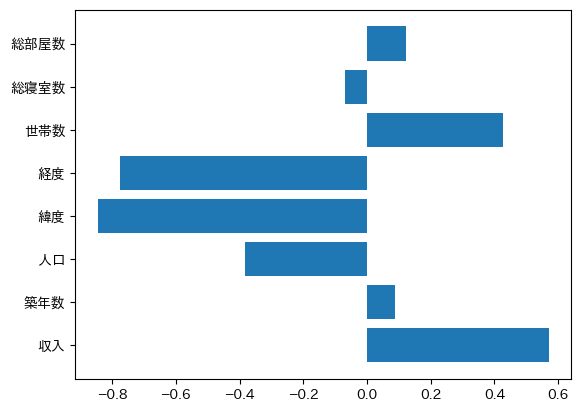

In [ ]:
# 線形回帰モデルにおける各説明変数の偏回帰係数を見る
plt.barh(range(len(x_cols)), model_linear.coef_, align='center')
plt.yticks(np.arange(len(x_cols)), x_cols)

## ランダムフォレスト回帰モデル用いた学習と予測
* 線形回帰モデルとの比較対象として、ランダムフォレストを使用します。
* ランダムフォレストは、複数の決定木を組み合わせたアンサンブルモデルの1つで、気軽に高い精度を出すことができます。


### 学習とR2スコアの算出
* 線形回帰と比べて高いスコアを出しています。
* ただし、訓練データに比べてテストデータのR2は低く、大きな差があります。（これを過学習といいます。）
* 

In [ ]:
from sklearn.ensemble import RandomForestRegressor # ランダムフォレスト回帰モデルのインポート

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

print(f"R2 (rf, train): {np.round(model_rf.score(X_train, y_train)*100, 2)}%")
print(f"R2 (rf, test): {np.round(model_rf.score(X_test, y_test)*100, 2)}%")

R2 (rf, train): 97.11%
R2 (rf, test): 79.07%


### 予測結果の確認
* 予測値は概ね真値と近い値を出せているようです

In [ ]:
print(f'予測値: {np.round(model_rf.predict(X_some), 3)}')
print(f'真値: {list(y_some)}')

予測値: [3.632 2.445 1.641 1.877 1.811]
真値: [3.821, 2.782, 1.573, 1.625, 1.583]


### 変数重要度の確認
* 偏回帰係数とは異なります
* 各説明変数のインパクトを知ることができます。

([<matplotlib.axis.YTick at 0x7f8e06c339d0>,
 [Text(0, 0, '収入'),
  Text(0, 1, '築年数'),
  Text(0, 2, '人口'),
  Text(0, 3, '緯度'),
  Text(0, 4, '経度'),
  Text(0, 5, '世帯数'),
  Text(0, 6, '総寝室数'),
  Text(0, 7, '総部屋数')])

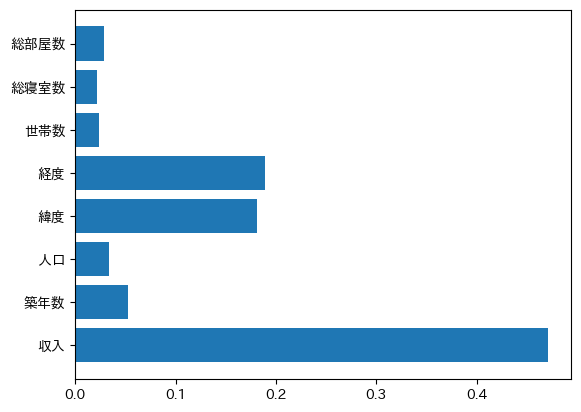

In [ ]:
# ランダムフォレスト回帰における変数重要度を見る
plt.barh(range(len(x_cols)), model_rf.feature_importances_, align='center')
plt.yticks(np.arange(len(x_cols)), x_cols)

## 2つのモデルの性能評価
* 訓練データとテストデータのRMSEを比較することで、予測精度と過学習の是非を確認しましょう
* 残差プロットを行って誤差の特徴を確認しましょう

In [ ]:
# テストデータでの予測を行う

linear_y_train_pred = model_linear.predict(X_train)
linear_y_test_pred = model_linear.predict(X_test)

rf_y_train_pred = model_rf.predict(X_train)
rf_y_test_pred = model_rf.predict(X_test)

y_true = y_test

### 評価指標 MSE（平均二乗誤差）, R2（決定係数）の算出


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

linear_rmse_train = np.sqrt(mean_squared_error(y_train, linear_y_train_pred))
linear_rmse_test = np.sqrt(mean_squared_error(y_true, linear_y_test_pred))
linear_r2_test = r2_score(y_true, linear_y_test_pred)

rf_rmse_train = np.sqrt(mean_squared_error(y_train, rf_y_train_pred))
rf_rmse_test = np.sqrt(mean_squared_error(y_true, rf_y_test_pred))
rf_r2_test = r2_score(y_true, rf_y_test_pred)

print("### Linear Model ###")
print(f"RMSE (Train): {np.round(linear_rmse_train, 3)}")
print(f"RMSE (Test): {np.round(linear_rmse_test, 3)}")
print(f"R2 (Test): {np.round(linear_r2_test, 3)}")

print("\n### Random Forest Model ###")
print(f"RMSE (Train): {np.round(rf_rmse_train, 3)}")
print(f"RMSE (Test): {np.round(rf_rmse_test, 3)}")
print(f"R2 (Test): {np.round(rf_r2_test, 3)}")

### Linear Model ###
RMSE (Train): 0.602
RMSE (Test): 0.622
R2 (Test): 0.589

### Random Forest Model ###
RMSE (Train): 0.163
RMSE (Test): 0.44
R2 (Test): 0.794


In [ ]:
# print(
#     pd.DataFrame(
#         [[np.round(np.sqrt(linear_rmse_train), 3), np.round(np.sqrt(rf_mse_train), 3)], []]
#     )
# )

**上の評価指標からわかること**
* 単純な線形回帰モデルより、ランダムフォレストモデルの方が精度がいい
* ランダムフォレストは、訓練データとテストデータのスコアに大きな差がある（**過学習している**）

### 線形回帰の残差プロット
* X軸に予測値を、Y軸に真値と予測値の誤差をプロットすることで、誤差の傾向の有無・外れ値の有無を知ることができます。


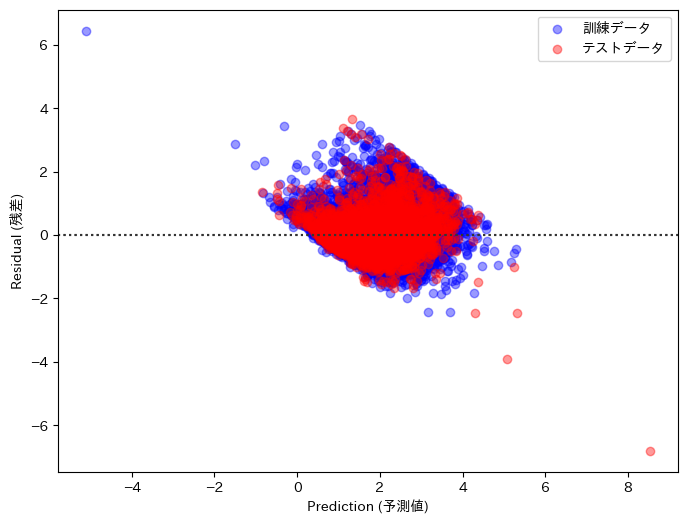

In [ ]:
plt.figure(figsize=(8, 6))

sns.residplot(x = linear_y_train_pred, y = y_train - linear_y_train_pred, scatter_kws={'alpha': 0.4, 'color': 'blue'}, label = '訓練データ')
sns.residplot(x = linear_y_test_pred , y = y_test - linear_y_test_pred, scatter_kws={'alpha': 0.4, 'color': 'red'}, label = 'テストデータ')
plt.legend()
plt.xlabel('Prediction (予測値)')
plt.ylabel('Residual (残差)')

plt.show()

### ランダムフォレスト回帰の残差プロット
* 線形回帰の横軸・縦軸の幅と比較すると、全体的に誤差が小さくなっていることがわかります。
* ただし、ランダムフォレストは過学習しているので、テストデータのばらつき（赤点）が訓練データのばらつき（青点）より大きいことがわかると思います。


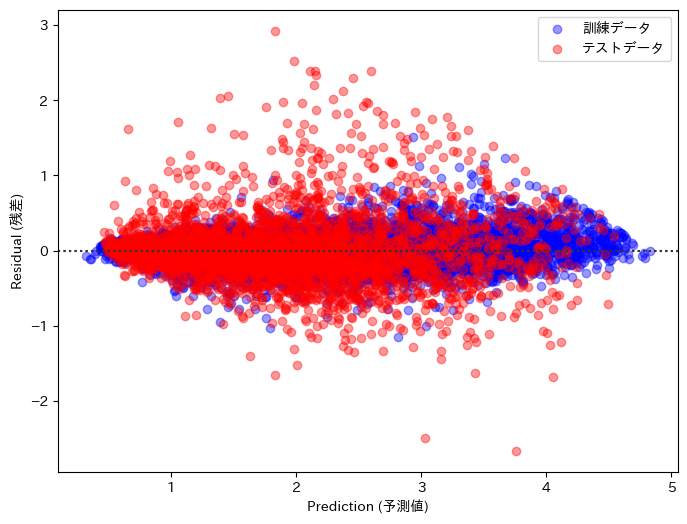

In [ ]:
plt.figure(figsize=(8, 6))

sns.residplot(x = rf_y_train_pred, y = y_train - rf_y_train_pred, scatter_kws={'alpha': 0.4, 'color': 'blue'}, label = '訓練データ')
sns.residplot(x = rf_y_test_pred, y = y_test - rf_y_test_pred, scatter_kws={'alpha': 0.4, 'color': 'red'}, label = 'テストデータ')
plt.legend()
plt.xlabel('Prediction (予測値)')
plt.ylabel('Residual (残差)')

plt.show()

## **おつかれさまでした！** 
* これで今回のハンズオンは以上になります。
* 初見かつ限られた時間で全てを理解するのはかなり難しかったと思います。
* 何度か読み返したり、じっくりグラフや値を見ることで、理解を深めることができるかもしれません。
* また、これで機械学習に興味を持った方は、ぜひもっと勉強されてみてください。
* ネット上にさまざまなドキュメントや教材、ロードマップ等があります。
* やっぱりデータサイエンスの世界は楽しいし、かっこいいと思います。データサイエンティストの方々が眩しいです。

### **最後に**
* このような勉強会で発表者を務めるのは初めての機会でした。
* いろいろと不慣れなところもあったと思います。
* 本日は参加していただきありがとうございました。
* これからもどうぞよろしくお願いします。
* 今回の分野に限らず、たのしく学びを深めていきましょう！







## おまけ
### じゃあ単純に毎回Random Forestを使うのがいいのか？
* Random Forest以外にもさまざまなアルゴリズムがあるため、その中から吟味する形になります。
* データセットの数、特徴量、評価指標の設定などによって、最適なアルゴリズムはその時々で異なると思います。
* scikit-learnの[チートシート](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html):

## GridSearchによるRandomForestのハイパーパラメータチューンニング
* RandomForestには、たくさんのパラメータ（ハイパーパラメータ）があり、最適な値を決定することで、精度を向上させることができます。
* ここでは、そのパラメータ探索する方代表的な手法の１つである、GridSearchを行なって、最適なパラメータを決定します。
* また、チューニング前のデフォルトの値と比べてどのように精度が向上したのか比較してみます。

### GridSearchの実行
* `params`に候補となるパラメータをGridSearchに渡すことで、総当たりで学習を行い、その中でも最もスコアがいいもの（今回はMSEが小さいもの）を返します。
* 総当たりでひとつひとつモデルを学習するので、時間が結構かかります。パラメータを細かくすればするほどより時間がかかります。

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

rf = RandomForestRegressor()

# ハイパーパラメータの列挙
params = {
    'bootstrap': [True], # 復元抽出
    'n_estimators': [5, 10, 20],
    'max_depth': [5, 10],
    'max_features': [4, 8],
    'min_samples_leaf': [6, 12],
    'min_samples_split': [8, 16],  # leaf < split
}

# クロスバリデーションの宣言
cv = KFold(n_splits=4, shuffle=False)

model_rf_tuned = GridSearchCV(estimator=rf, param_grid=params, scoring="neg_mean_squared_error",
                              cv=cv, n_jobs=-1)
model_rf_tuned.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10],
                         'max_features': [4, 8], 'min_samples_leaf': [6, 12],
                         'min_samples_split': [8, 16],
                         'n_estimators': [5, 10, 20]},
             scoring='neg_mean_squared_error')

### 最適なハイパーパラメータを確認してみる
ちなみにデフォルトは以下のような値です。
* n_estimators: int = 100, 
* max_depth: Any
* min_samples_split: int = 2, 
* min_samples_leaf: int = 1, 
* max_features: float = 1
* bootstrap: bool = True
* max_samples: None

In [ ]:
print(model_rf_tuned.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 6, 'min_samples_split': 8, 'n_estimators': 20}


### チューニング前後で性能の変化をみてみる
* R2は変化しませんでしたが、TrainとTestのRMSEの差が小さくなっているので、過学習抑えられている = 汎化性能が向上している = 多様性のある/未知のデータに強くなったといえます。

In [ ]:
rf_tuned_y_train_pred = model_rf_tuned.predict(X_train)
rf_tuned_y_test_pred = model_rf_tuned.predict(X_test)

rf_tuned_rmse_train = np.sqrt(mean_squared_error(y_train, rf_tuned_y_train_pred))
rf_tuned_rmse_test = np.sqrt(mean_squared_error(y_true, rf_tuned_y_test_pred))
rf_tuned_r2_test = r2_score(y_true, rf_tuned_y_test_pred)

print("\n### Random Forest Model (Non-tuned) ###")
print(f"RMSE (Train): {np.round(rf_rmse_train, 3)}")
print(f"RMSE (Test): {np.round(rf_rmse_test, 3)}")
print(f"R2 (Test): {np.round(rf_r2_test, 3)}")

print("\n### Random Forest Model (Tuned) ###")
print(f"RMSE (Train): {np.round(np.sqrt(rf_tuned_rmse_train), 3)}")
print(f"RMSE (Test): {np.round(np.sqrt(rf_tuned_rmse_test), 3)}")
print(f"R2 (Test): {np.round(rf_tuned_r2_test, 3)}")


### Random Forest Model (Non-tuned) ###
RMSE (Train): 0.163
RMSE (Test): 0.44
R2 (Test): 0.794

### Random Forest Model (Tuned) ###
RMSE (Train): 0.631
RMSE (Test): 0.69
R2 (Test): 0.759
